In [12]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import math as math

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


In [13]:
m = UNITS.meter;
s = UNITS.seconds;
kg = UNITS.kilograms;
N = UNITS.newton;
AU = UNITS.astronomical_units;

In [14]:
m_earth = 5.972e24*kg
m_sun = 1.989e30*kg
d_init = (1*AU).to_base_units()/m
G = 6.67408e-11*((N*m**2)/kg**2)
r_earth = 6.371e6*m
r_sun = 695.508e6*m

<Quantity(695508000.0, 'meter')>

In [26]:
init = State(x = d_init, y = 0, vx = 0, vy = -30e3)
system = System(init = init,
                m_earth = m_earth,
                m_sun = m_sun,
                d_final = r_sun + r_earth,
                G = G,
                t_0 = 0*s,
                t_end = ((1.02*UNITS.year).to(UNITS.second))) #kms standard

,values
init,x 149597870691.0 dimensionless y ...
m_earth,5.972e+24 kilogram
m_sun,1.989e+30 kilogram
d_final,701879000.0 meter
G,6.67408e-11 meter ** 2 * newton / kilogram ** 2
t_0,0 second
t_end,32188064.494194 second


In [27]:
def force_gravitation(state, system):
    unpack(system)
    x, y, vx, vy = state
    
    #position = Vector(x, y)
    #r = sqrt(x**2 + y**2)*m
    #mag = G * m_sun * m_earth / r ** 2
    #direction = -position.hat()
    #force = direction * mag
    r = sqrt(x**2 + y**2)
    force = G*(m_earth*m_sun)/(r**2)
    angle = math.atan2(y,x) + pi
    force = Vector(force * math.cos(angle), force * math.sin(angle))
    
    return force/m


In [28]:
force_gravitation(init, system)

<Quantity([-3.54238016e+22  4.33816452e+06], 'meter * newton')>

In [29]:
def slope_func(state, t, system):
    unpack(system)
    x, y, vx, vy = state
    
    force = force_gravitation(state, system)
    
    velocity = Vector(vx, vy)
    acceleration = force/m_earth
   
    #return velocity.x, velocity.y, acceleration.x, acceleration.y
    return velocity, acceleration


In [30]:
slope_func(init, 0, system)

(<Quantity([     0. -30000.], 'dimensionless')>,
 <Quantity([-5.93164795e-03  7.26417367e-19], 'meter * newton / kilogram')>)

In [31]:
def event_func(state, t, system):
    x,y,vx,vy = state
    r = sqrt(x**2 + y**2)*m
    return r - system.d_final

In [32]:
event_func(init, 0, system)

<Quantity(148895991691.0, 'meter')>

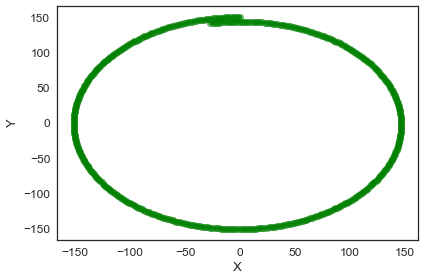

In [33]:
ts = linspace(t_0, system.t_end, 500)*s
results, details = run_ode_solver(system, slope_func, vectorized = True, events=event_func, t_eval = ts)
#results, details = run_ode_solver(system, slope_func, method='LSODA', min_step=99)
results.index /= 60*60*24
results.x /= 1e9
results.y /= 1e9
details
plot(results.y, results.x, 'go-')
decorate(xlabel = 'X',
        ylabel = 'Y')

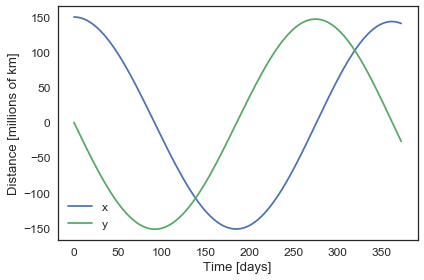

In [34]:
results.x.plot()
results.y.plot()
decorate(ylabel = 'Distance [millions of km]',
         xlabel = 'Time [days]')

In [35]:
final_day = get_last_value(results.index)

372.547042756875